In [99]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.KMNIST(root='../../data',        #instead of KMNIST , just type CIFAR10 . Please check the spelling
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.KMNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 300 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)

0it [00:00, ?it/s]

18169856it [00:02, 6279032.09it/s]                              


Extracting ../../data/KMNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 59180.75it/s]                            
0it [00:00, ?it/s]

Extracting ../../data/KMNIST/raw/train-labels-idx1-ubyte.gz


3047424it [00:01, 1775629.98it/s]                             
0it [00:00, ?it/s]

Extracting ../../data/KMNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 19691.04it/s]            


Extracting ../../data/KMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!
Epoch [1/5], Step [300/600], Loss: 0.4676
Epoch [1/5], Step [600/600], Loss: 0.1444
Epoch [2/5], Step [300/600], Loss: 0.1817
Epoch [2/5], Step [600/600], Loss: 0.2526
Epoch [3/5], Step [300/600], Loss: 0.1385
Epoch [3/5], Step [600/600], Loss: 0.1645
Epoch [4/5], Step [300/600], Loss: 0.0762
Epoch [4/5], Step [600/600], Loss: 0.1076
Epoch [5/5], Step [300/600], Loss: 0.0426
Epoch [5/5], Step [600/600], Loss: 0.0360


In [127]:
import torch
import torch.nn as nn
class Kuzushiji(nn.Module):
    def __init__(self):
        super(Kuzushiji, self).__init__()
        self.pad1 = nn.ZeroPad2d((2, 2))
        
        self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(7, 7), stride=(1, 1), bias=False), 
        nn.BatchNorm2d(num_features=32),
        nn.MaxPool2d(kernel_size=(2,2)),
        nn.ReLU()
        )
    
        
        self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(5, 5), stride=(1, 1), bias=False), 
        nn.BatchNorm2d(num_features=64),
        nn.ReLU()
        )
        
        self.layer3 = nn.Sequential(
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3), stride=(1, 1), bias=False), 
        nn.BatchNorm2d(num_features=128),
        nn.MaxPool2d(kernel_size=(2,2)),
        nn.ReLU()
        )
        
        self.fc1 = nn.Sequential(
        nn.Linear(in_features=768, out_features=512),
        nn.ReLU()
        )
        self.dropout1 = nn.Dropout(p=0.2)
        
        self.fc2 = nn.Sequential(
        nn.Linear(in_features=512, out_features=10),
        nn.Softmax()
        )
    def forward(self, x):
        x = self.pad1(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = x.reshape(x.shape[0], -1)
       # print(x.shape)
        x = self.fc1(x)
        x = self.dropout1(x)
        out = self.fc2(x)
        
        return out

In [128]:
my_model = Kuzushiji().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(my_model.parameters(), lr=learning_rate) 

In [129]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 1, 28,28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = my_model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch [1/5], Step [100/600], Loss: 1.5820
Epoch [1/5], Step [200/600], Loss: 1.5523
Epoch [1/5], Step [300/600], Loss: 1.5631
Epoch [1/5], Step [400/600], Loss: 1.5315
Epoch [1/5], Step [500/600], Loss: 1.5182
Epoch [1/5], Step [600/600], Loss: 1.5393
Epoch [2/5], Step [100/600], Loss: 1.4870
Epoch [2/5], Step [200/600], Loss: 1.5156
Epoch [2/5], Step [300/600], Loss: 1.4956
Epoch [2/5], Step [400/600], Loss: 1.5423
Epoch [2/5], Step [500/600], Loss: 1.4985
Epoch [2/5], Step [600/600], Loss: 1.5378
Epoch [3/5], Step [100/600], Loss: 1.5008
Epoch [3/5], Step [200/600], Loss: 1.5116
Epoch [3/5], Step [300/600], Loss: 1.4695
Epoch [3/5], Step [400/600], Loss: 1.5066
Epoch [3/5], Step [500/600], Loss: 1.5287
Epoch [3/5], Step [600/600], Loss: 1.5420
Epoch [4/5], Step [100/600], Loss: 1.5008
Epoch [4/5], Step [200/600], Loss: 1.4962
Epoch [4/5], Step [300/600], Loss: 1.5310
Epoch [4/5], Step [400/600], Loss: 1.5053
Epoch [4/5], Step [500/600], Loss: 1.4961
Epoch [4/5], Step [600/600], Loss:

In [131]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 1, 28, 28).to(device)
        labels = labels.to(device)
        outputs = my_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the 10000 test images: 91.64 %


In [132]:
for param in my_model.parameters():
    param.requires_grad= False

In [141]:
l =[]
sign = []
for epoch in range(1):
    for i, (images, labels) in enumerate(test_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 1,28,28).to(device)
        images.requires_grad=True
        labels = labels.to(device)
        
        # Forward pass
        outputs = my_model(images)
        loss = criterion(outputs, labels)

#         # Backward and optimize

        loss.backward()
        c =images.grad.sign()
        images = images+ 0.01* c
        sign.append(c)
        l.append((images,labels))



/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [142]:
im, _ = l[0]
im = im.data.cpu().numpy()

In [143]:
im = im.reshape(100, 28, 28)

In [144]:
import matplotlib.pyplot as plt


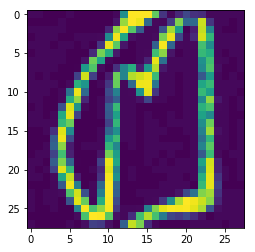

In [145]:
plt.imshow(im[2])

In [146]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in l:
        images = images.reshape(-1,1, 28,28).to(device)
        labels = labels.to(device)
        outputs = my_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 88.62 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
